In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import QTable
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
ravetable = QTable.read('NEW_rave_tgas_query.csv', format='csv')
#parallax error error fixed!

In [4]:
print(ravetable)

row_id    ID_TGAS_source        RA_TGAS       ... phot_g_mean_mag_TGAS   HRV  
------ ------------------- ------------------ ... -------------------- -------
     1 5472450241103924224 156.23182631221437 ...      9.8990624156966  17.929
     2 5472934404177638016  155.6757147543367 ...    9.669932745468348   27.33
     3 5472961651450144128 155.67257158269777 ...    9.403665589028403   12.13
     4 5470860587808517120  158.9734503220959 ...   10.119686672861922  38.949
     5 3468060163078890752 184.89737863576525 ...   10.123850113157598  10.372
     6 6158339888161766400 188.61283657498848 ...    9.852586829713339  34.075
     7 6158610402382100096  188.1046316601183 ...    9.620809841126782 -20.148
     8 6158160633407813888 188.96842670922464 ...    9.936459984602394  36.845
     9 6123173658014875136 213.83424541365062 ...   10.767653224679348 -11.692
    10 6123181698193650176 213.84389869951852 ...    9.535751921865415   7.105
   ...                 ...                ... ...   

In [5]:
pmra = ravetable['pmRA_TGAS']
pmde = ravetable['pmDE_TGAS']
ra = ravetable['RA_TGAS']
dec = ravetable['DE_TGAS']
hrv = ravetable['HRV']
plx = ravetable['parallax_TGAS']
pm = np.sqrt(pmde**2 + (pmra**2) * np.cos(dec)**2)

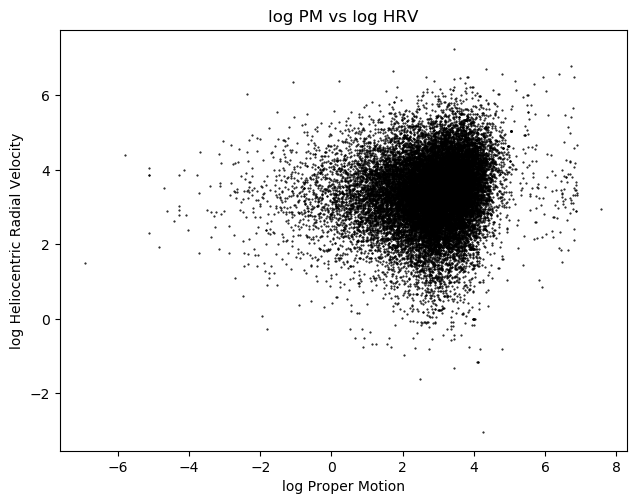

In [6]:
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.set_size_inches(8,8)
 
fig.tight_layout()

ax.set_ylabel("log Heliocentric Radial Velocity")
ax.set_xlabel("log Proper Motion")
ax.set_title("log PM vs log HRV")
    
ax.plot(np.log(hrv), np.log(pm), color='k', marker='.', markersize=1, linestyle='None');

In [42]:
pmra = pmra * 0.001
pmde = pmde * 0.001
plx = plx * 0.001

In [7]:
rangp = np.radians(192.8583)
decngp = np.radians(27.1280559)
theta0 = np.radians(122.93191857)
k = 4.704057
U = None
V = None
W = None
#U = ravetable['U']
#V = ravetable['V']
#W = ravetable['W']

In [9]:
T1 = np.array( [((np.cos(theta0)), (np.sin(theta0)), 0),
                ((np.sin(theta0)), (-1 * np.cos(theta0)), 0),
                (0,0,1)
               ])

T2 = np.array( [((-1 * np.sin(decngp)), 0, (np.cos(decngp))),
                (0,-1,0),
                ((np.cos(decngp)), 0, (np.sin(decngp)))
               ])

T3 = np.array( [((np.cos(rangp)), (np.sin(rangp)), 0),
                ((np.sin(rangp)), (-1 * np.cos(rangp)), 0),
                (0,0,1)
               ])

T = T1.dot(T2).dot(T3)
print(T)

[[-0.05489194 -0.87343561 -0.48383584]
 [ 0.4940978  -0.44484035  0.74698355]
 [-0.86767173 -0.19805885  0.45598076]]


In [10]:
A = np.array( [(np.degrees(np.cos(ra)*np.cos(dec)), -np.degrees(np.sin(ra)), -np.degrees(np.cos(ra)*np.cos(dec))),
                (np.degrees(np.sin(ra)*np.cos(dec)), np.degrees(np.cos(ra)), -np.degrees(np.sin(ra)*np.sin(dec))),
                (np.degrees(np.sin(dec)), 0, np.degrees(np.cos(dec)))
               ])
B = T.dot(A)
print(B)

[[ 44.49145689 -35.46898154  -3.89332445]
 [ 11.92808533   4.36423279  30.35317544]
 [-34.0739988  -44.78516686  55.58278725]]


In [20]:
GCC = B.dot(np.array( [(hrv),
                       (k*pmra/plx),
                       (k*pmde/plx)
                      ]))
GCC

array([[ 1666.51597454,  1354.4470405 ,  1491.74552299,  2359.97041515,
         -193.51563506,  2535.65077614,  1116.20442825,  -186.31641372,
          551.30263306,  1381.4637607 ],
       [   88.36788054,   -86.50265823,   285.52945156,  -559.12979197,
          390.18670678,  -572.65650769, -1122.00476678,   183.4604782 ,
         -540.81413579,   -89.35554755],
       [  448.47930842, -1557.21674397,  1311.26844347, -2452.26783276,
         -804.00792671, -1602.40554772,  1943.76673257, -4533.96106813,
         1205.53577539,  1015.95830798]])

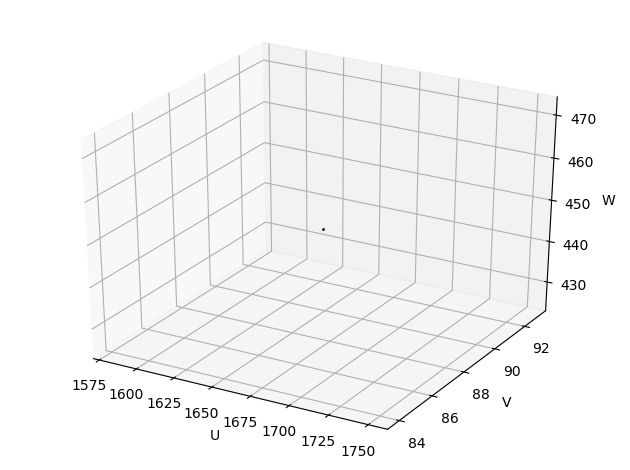

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

fig.tight_layout()

ax.set_xlabel("U")
ax.set_ylabel("V")
ax.set_zlabel("W")

ax.scatter(GCC[0], GCC[1], GCC[2], c = 'k', s=1, alpha=1);

In [73]:
testable = pd.read_csv('smallravetable.csv')
testable = testable.iloc[[0]]
pmra = testable['pmRA_TGAS']
pmde = testable['pmDE_TGAS']
ra = testable['RA_TGAS']
dec = testable['DE_TGAS']
hrv = testable['HRV']
plx = testable['parallax_TGAS']

In [68]:
rangp = np.radians(192.8583)
decngp = np.radians(27.1280559)
theta0 = np.radians(122.93191857)
k = 4.704057
U = None
V = None
W = None
#U = ravetable['U']
#V = ravetable['V']
#W = ravetable['W']

In [69]:
T1 = np.array([[np.cos(theta0), (np.sin(theta0)), 0],
                [(np.sin(theta0)), (-1 * np.cos(theta0)), 0],
                [0, 0, 1]])

T2 = np.array([[(-1 * np.sin(decngp)), 0, (np.cos(decngp))],
                [0,-1,0],
                [(np.cos(decngp)), 0, (np.sin(decngp))]
               ])

T3 = np.array([[(np.cos(rangp)), (np.sin(rangp)), 0],
                [(np.sin(rangp)), (-1 * np.cos(rangp)), 0],
                [0,0,1]
               ])

T = T1.dot(T2).dot(T3)
type(T)

numpy.ndarray

In [70]:
A = np.array([[np.degrees(np.cos(ra)*np.cos(dec)), -np.degrees(np.sin(ra)), -np.degrees(np.cos(ra)*np.cos(dec))],
                [np.degrees(np.sin(ra)*np.cos(dec)), np.degrees(np.cos(ra)), -np.degrees(np.sin(ra)*np.sin(dec))],
                [np.degrees(np.sin(dec)), 0, np.degrees(np.cos(dec))]
               ])
B = T.dot(A)

In [75]:
C = np.array([[hrv], [k*pmra/plx], [k*pmde/plx]])
#GCC = B.dot(C)
C.shape

(3, 1, 1)